In [ ]:
# !pip install nest_asyncio
!pip install snscrape
!pip install nlp==0.4.0

import re
import snscrape.modules.twitter as sntwitter
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re 
!pip3 install spacy
!python3 -m spacy download en_core_web_lg
import spacy
nlp = spacy.load('en_core_web_lg')
# import nest_asyncio
# nest_asyncio.apply()

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
  Using cached typing_extensions-3.10.0.2-py3-none-any.whl (26 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Not uninstalling typing-extensions at /shared-libs/python3.7/py-core/lib/python3.7/site-packages, outside environment /root/venv
    Can't uninstall 'typing-extensions'. No files were found to uninstall.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
2022-03-18 00:34:19.097896: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could no

In [ ]:
# Creating list to append tweet data to
tweets_list2 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('Banana Republic since:2022-01-01 until:2022-03-17').get_items()):
    if i>5000:
        break
    tweets_list2.append([tweet.date, tweet.id, tweet.content])
    
# Creating a dataframe from the tweets list above
tweets_df2 = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Text'])
display(tweets_df2)

,Datetime,Tweet Id,Text
0,2022-03-16 23:53:51+00:00,1504244585761017859,We are officially a banana republic with Kanga...
1,2022-03-16 23:49:34+00:00,1504243507447402496,@libdemdaisy @simonapcliff @ukhomeoffice Banan...
2,2022-03-16 23:47:07+00:00,1504242892759617542,Check out Banana Republic Issa Collection Dres...
3,2022-03-16 23:43:50+00:00,1504242063881097220,Check out this listing I just added to my #Pos...
4,2022-03-16 23:42:30+00:00,1504241730031398913,Money is dying \nLaws are meaningless\nThis co...
...,...,...,...
4996,2022-03-09 20:24:43+00:00,1501655242492071942,@KagisoMonyadiwa @TimesLIVE Our President is n...
4997,2022-03-09 20:24:23+00:00,1501655157792296965,@Cloud_Pascal @LecrownedPrince The only reason...
4998,2022-03-09 20:23:20+00:00,1501654894209605638,@Our_DA This is indeed a banana republic!
4999,2022-03-09 20:22:40+00:00,1501654724126416897,@monterussia @olliecarroll Amazing that so man...


In [ ]:
df = tweets_df2['Text']

all_sentences = []

for word in df:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

lines2

#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
stem

stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

stem2

df = pd.DataFrame(stem2)

df = df[0].value_counts()

display(df)

banana                3956
republ                3921
check                 2060
poshmark              2007
poshmarkapp           1999
                      ... 
amp4                     1
httpstcolmd4cox2ji       1
jampk                    1
nobittu                  1
pps                      1
Name: 0, Length: 16254, dtype: int64

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


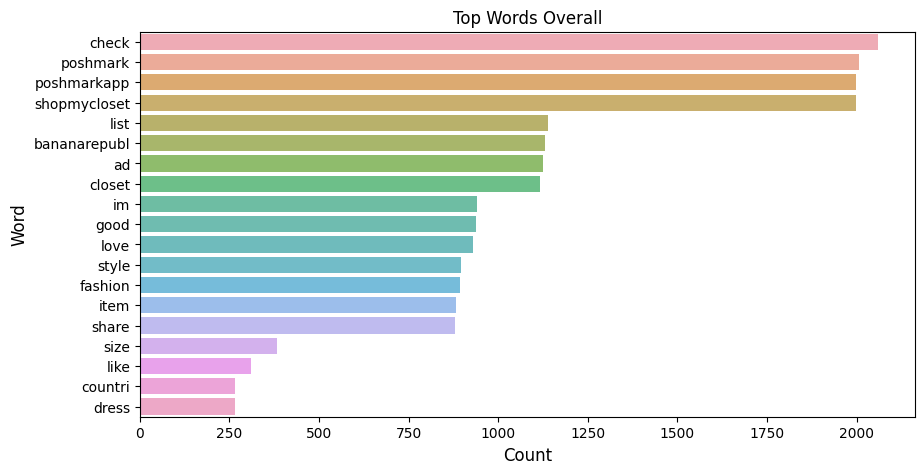

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = df[1:21,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overall'  b)
plt.ylabel('Word', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9e88faaf-ade4-4526-a9d5-3a022b266140' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>